# Exploratory Data Analysis for House Prices in Pakistan 2023


This dataset is about Pakistan Houses. The dataset is from Zameen.com website. In this dataset, we have 168446 rows and 20 columns, a large dataset. We will be able to get hands-on experience while performing some data cleaning and visualization tasks in order to understand how real-world problem statement analysis is done. This dataset was gotten from kaggle at https://www.kaggle.com/datasets/howisusmanali/house-prices-2023-dataset?select=House_Price_dataset.csv.

### About Dataset

The dataset contains the following:

- Property id: The unique value of each Property.
- Location id: The unique value of each location is based on the subcategory of the city.
- Page URL: The URL of the page where the property was published.
- Property type: In this section we have six different types:

1. House
2. FarmHouse
3. Upper Portion
4. Lower Portion
5. Flat
6. Room

- Price: Price is a dependent feature/parameter in this dataset.
- City: In this dataset the total number of cities is five:

1. Lahore
2. Karachi
3. Faisalabad
4. Rawalpindi
5. Islamabad

- Province: Province parameter is about the state of the city
- Location: It is about the different kinds of locations in each city.
- Lastly, the Latitude and Longitude of the Cities.

In this Exploratory Data Analysis, we are trying to do the following tasks;

1. Handling Missing Values
2. Explore numerical features.
3. Explore categorical features.
4. Finding relations between features.

The following tools and libraries will be used;

Python

Pandas

Numpy

Matplotlib

Seaborn

This project is a part of an amazing course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

## Downloading the Dataset


We are downloading the dataset from KAGGLE: https://www.kaggle.com/datasets/howisusmanali/house-prices-2023-dataset?select=House_Price_dataset.csv

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/howisusmanali/house-prices-2023-dataset?select=House_Price_dataset.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andrewndudiefomah
Your Kaggle Key: ········


100%|██████████| 12.4M/12.4M [00:02<00:00, 4.58MB/s]


The dataset has been downloaded and extracted.

In [4]:
data_dir = './house-prices-2023-dataset'

In [5]:
import os
os.listdir(data_dir)

['Cleaned_data_for_model.csv',
 'For_EDA_dataset.csv',
 'House_Price_dataset.csv']

It seems like the dataset contains three csv files:

1. Cleaned_data_for_model.csv

2. For_EDA_dataset.csv

3. House_Price_dataset.csv

In [6]:
data_filename = './house-prices-2023-dataset/House_Price_dataset.csv'

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "eda-for-house-prices-in-pakistan-2023"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

## Data Loading and Preparation


Now we will be loading the data frame using Pandas. Then we will explore the number of rows and columns, ranges of values etc. and also hanlde missing, incorrect and invalid data incluidng any additional task such as merging multiple data.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
house_df = pd.read_csv(data_filename)

In [14]:
house_df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


The dataset contains about168,000 rows and 20 columns which reflects the price of houses in Pakistan. Some columns seem to irrelevant, as such we will drop some columns, and if possible deal with some missing data.

Lets view the list of columns in the data frame

In [15]:
house_df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

# Data Cleaning

In this section, we will be doing data cleaning so as to prepare the uploaded data for exploration and visualization. We will remove duplicates as well as drop some columns that are not relevant in our analysis.

Now, its time to dive deeper into understanding the data properly by exploring the general statistics, information and shape of the dataset. This information will help us identify the missing data, as well the mean, quartiles and also help us decide whether we want to keep some columns or drop them.

In [16]:
house_df.shape

(168446, 20)

In [17]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that some column ('agent', 'agency') contains some empty/missing values since the Non-Null count is lower than the total number of rows (168446). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

To make our analysis easier, we will convert some columns into other data types while dropping some unimportant columns. 

In [18]:
house_df.describe() #  This help to get the basic statistics of numerical columns of the dataset

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


Now, lets find the sum of missing values, and decide on what to do with the missing values

In [19]:
house_df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

From the 'agency' and 'agent' coulmns, we have about 44070 null values. This makes about 26 percentage of the total dataset.
So its either we fix the missing values or probably drop the entire two columns if we find them not useful.

In [20]:
total_dataset = house_df.index.stop
null_values=house_df['agent'].isnull().sum()

percentage_missing_values = (null_values/total_dataset)*100
percentage_missing_values

26.16387447609323

In [21]:
house_df.nunique()

property_id      168446
location_id        4198
page_url         168446
property_type         7
price              2077
location           1509
city                  5
province_name         3
latitude           7838
longitude          8316
baths                16
area                344
purpose               2
bedrooms             23
date_added          124
agency             5761
agent             10598
Area Type             2
Area Size           247
Area Category        22
dtype: int64

The dataset revealed that there are 7 unique property_types, 5 unique cities, 3 unique province_names, and 2 purposes of the properties.

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

For now, we will be dropping some columns due to their irrelevance to our data analysis. These columns are;

1. proporty_id
2. location_id
3. page_url
4. agency
5. agent

If along our analysis, we find some other data irrelevant, we might likely drop them as well.

In [23]:
house_df.drop(columns=["property_id", "location_id", "page_url", "agency", "agent"], inplace = True)

In [24]:
house_df.head(5)

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,Marla,4.0,0-5 Marla
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,Marla,5.6,5-10 Marla
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,Marla,8.0,5-10 Marla
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,Kanal,2.0,1-5 Kanal
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Marla,8.0,5-10 Marla


#### Removal of Duplicate Values

In [25]:
house_df.duplicated().sum()

20489

There are 20489 duplicated values. Its necessary that we remove the duplicate values

In [26]:
house_df.drop_duplicates(inplace=True)

Lets confirm again if we still have have duplicate values

In [27]:
house_df.duplicated().sum()

0

In [28]:
house_df

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,Marla,4.0,0-5 Marla
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,Marla,5.6,5-10 Marla
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,Marla,8.0,5-10 Marla
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,Kanal,2.0,1-5 Kanal
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168440,Flat,4800000,Gadap Town,Karachi,Sindh,25.022481,67.129082,0,3.8 Marla,For Sale,2,07-18-2019,Marla,3.8,0-5 Marla
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Marla,9.6,5-10 Marla
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Marla,8.0,5-10 Marla
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Marla,9.6,5-10 Marla


Now, when you look at the area type and area size, you will discover that they are in marla and kanal, and we can;t have an accurate visualization with two different units of area. So, it is important that we change the Area Size from Marla and Kanal into only Marla.

In [29]:
Area_size_marla = house_df[['Area Type','Area Size']].apply(lambda x: x['Area Size']*20 if x['Area Type'] in ['Kanal'] else x, axis=1)

In [30]:
Area_size_marla.drop(['Area Type'],axis=1,inplace=True)

In [31]:
Area_size_marla.rename(columns={'Area Size':'Area_size_Marla'},inplace=True)

In [32]:
house_df=pd.concat([house_df,Area_size_marla],axis=1)

In [33]:
house_df

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category,Area_size_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,Marla,4.0,0-5 Marla,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,Marla,5.6,5-10 Marla,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,Marla,8.0,5-10 Marla,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,Kanal,2.0,1-5 Kanal,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Marla,8.0,5-10 Marla,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168440,Flat,4800000,Gadap Town,Karachi,Sindh,25.022481,67.129082,0,3.8 Marla,For Sale,2,07-18-2019,Marla,3.8,0-5 Marla,3.8
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Marla,9.6,5-10 Marla,9.6
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Marla,8.0,5-10 Marla,8.0
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Marla,9.6,5-10 Marla,9.6


In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

Now, we will be dropping area, area category, area type and area size, as we won't be needing them for further analysis

In [35]:
house_df.drop(columns=["area", "Area Type", "Area Size", "Area Category"], inplace = True)

In [36]:
house_df.head(5)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area_size_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,8.0


In [37]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147957 entries, 0 to 168444
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   property_type    147957 non-null  object 
 1   price            147957 non-null  int64  
 2   location         147957 non-null  object 
 3   city             147957 non-null  object 
 4   province_name    147957 non-null  object 
 5   latitude         147957 non-null  float64
 6   longitude        147957 non-null  float64
 7   baths            147957 non-null  int64  
 8   purpose          147957 non-null  object 
 9   bedrooms         147957 non-null  int64  
 10  date_added       147957 non-null  object 
 11  Area_size_Marla  147957 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.7+ MB


Lets get the correlation between the various numeric columns by using house_df.corr

In [38]:
house_df.corr()

,price,latitude,longitude,baths,bedrooms,Area_size_Marla
price,1.000000,-0.070866,-0.019978,0.217375,0.304072,0.105916
latitude,-0.070866,1.000000,0.924510,0.066797,0.044209,0.021702
longitude,-0.019978,0.924510,1.000000,0.105951,0.087763,0.018654
baths,0.217375,0.066797,0.105951,1.000000,0.656795,0.020300
bedrooms,0.304072,0.044209,0.087763,0.656795,1.000000,0.024778
Area_size_Marla,0.105916,0.021702,0.018654,0.020300,0.024778,1.000000


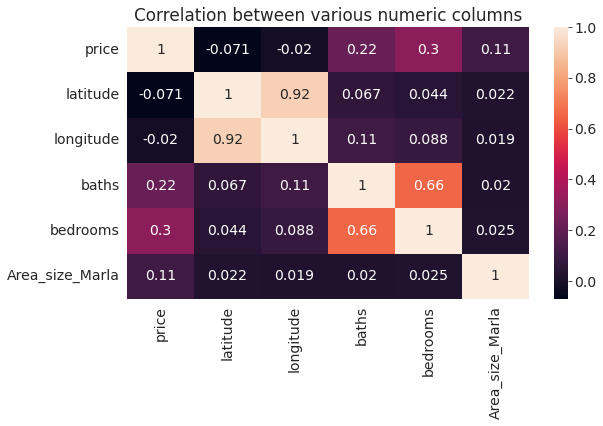

In [39]:
sns.heatmap(house_df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.title('Correlation between various numeric columns')

plt.show()


From the heatmap above, we can see a good correlation between price and baths, bedrooms and Area_size_Marla.

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

## Exploratory Analysis and Visualization


Before we ask questions about the house prices, it would be good we explore and understand certain variables that influence the house price. Such as property_types, city, province etc. It's essential to explore these variables to
understand the dataset better



### Property_type
Let's look at the number of property types upon which this dataset was based and plot a bar chart of the different property types


In [41]:
house_df['property_type'].nunique()

7

In [42]:
house_df['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

We can identify the number of property_types by using the value_counts method.


In [43]:
property_count = house_df['property_type'].value_counts()

In [44]:
property_count

House            93061
Flat             33265
Upper Portion    12011
Lower Portion     7968
Room               659
Farm House         618
Penthouse          375
Name: property_type, dtype: int64

We can visualize this information using a bar chart.


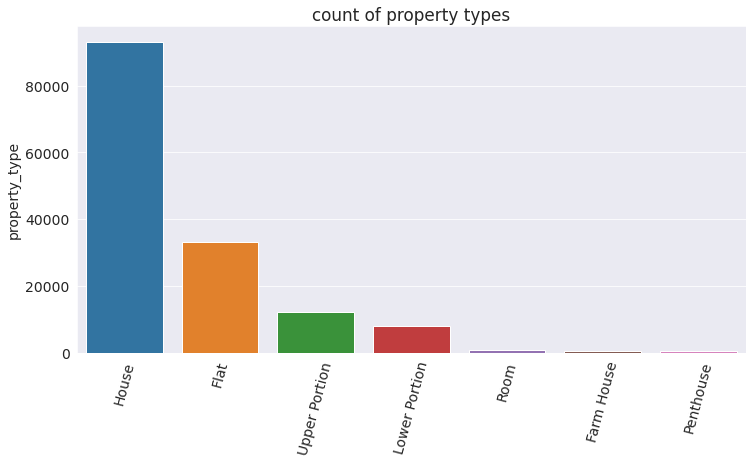

In [45]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('count of property types')
sns.barplot(x=property_count.index, y=property_count);


It appears that 'house' is the highest property type in this dataset. This is probably because houses are the most abundant property types in Pakistan while penthouse is the least. The reason could also possibly be because families tend to live together in a large house in order to foster unity and cooperation.


### Price
The price is another crucial factor to look at. We will sort the price and look at some crucial factors that determine the price.

In [46]:
house_df['price'].sort_values(ascending = False)

85499     2000000000
58032     1450000000
68867     1430000000
77087     1350000000
15320     1270000000
             ...    
156148             1
162480             1
132855             0
66537              0
91608              0
Name: price, Length: 147957, dtype: int64

In [47]:
house_df[house_df['price'] == 0]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area_size_Marla
66537,House,0,Range Road,Rawalpindi,Punjab,33.598593,73.018003,0,For Rent,0,05-06-2019,5.0
91608,Farm House,0,Gadap Road,Karachi,Sindh,25.053956,67.253365,0,For Sale,0,06-21-2019,160.0
132855,House,0,Gulshan Abad,Rawalpindi,Punjab,33.530556,73.061264,0,For Sale,0,07-05-2019,10.0


It is interesting to know that irrespective of the property_type, city and province, any property type without baths and bedrooms have a procr value of zero/ This is an interesting obervation.

### Baths
The number of baths also determines the Price of the property. So it will be good we explore the number of baths in the properties.

In [48]:
baths_count = house_df['baths'].value_counts()
baths_count

0      35572
3      29060
2      22449
4      17985
6      15362
5      14067
7       5151
1       4792
8       1970
10       839
9        688
12        10
11         5
13         3
14         3
403        1
Name: baths, dtype: int64

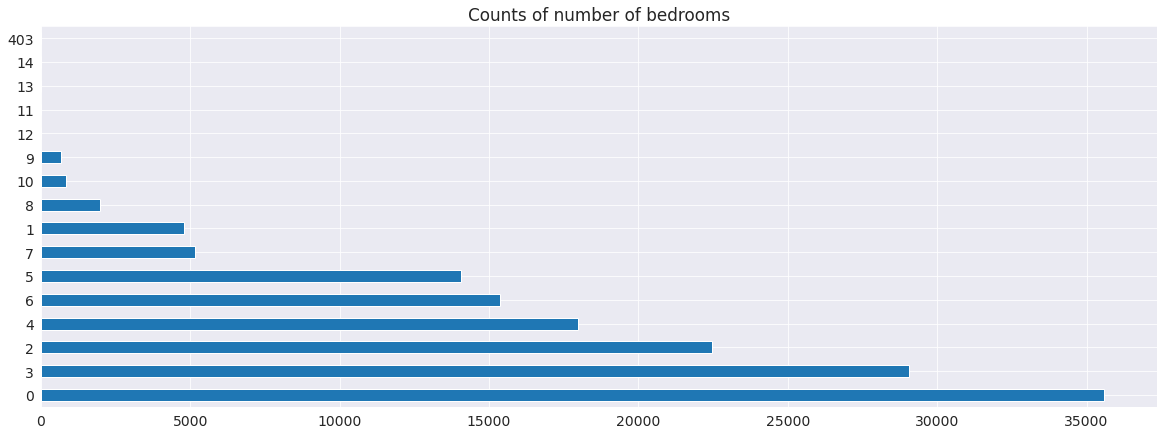

In [50]:
baths_count.plot.barh(title=('Counts of number of bedrooms'));

From the chart above, we can see that 35000 of the properties have zero baths. Surprisingly, 1 property has 403 baths which is very ridiculous. So it will be good we explore further to know the property that has such high number of baths, so as to decide on whether to drop the row if its a mistake.

In [51]:
house_df[house_df['baths'] == 403]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area_size_Marla
129605,House,15000000,Khayaban-e-Sir Syed,Rawalpindi,Punjab,33.638847,73.048089,403,For Sale,6,07-04-2019,5.0


It is clear that 403 baths is an outlier. But we will leave it the way it is and probably make further inquiry from the client or browse the internet to ascertain the high number of baths in a house in Rawalpindi city of Punjab Province.

### Bedrooms
The number of bedrooms also determines the Price of the property. So it will be good we explore the number of bedrooms in the properties.

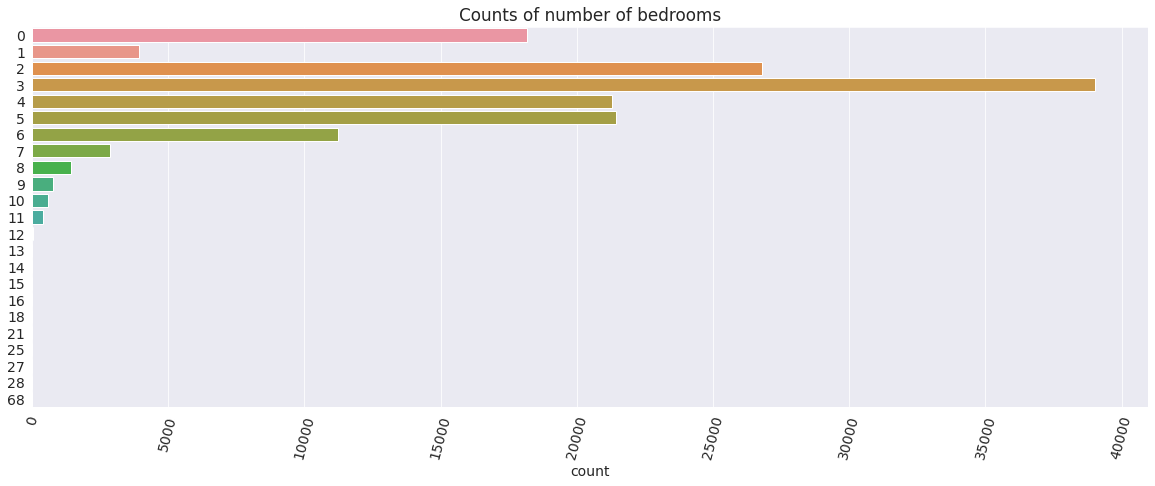

In [52]:
sns.countplot(y=house_df['bedrooms'])
plt.xticks(rotation=75);
plt.title('Counts of number of bedrooms')
plt.ylabel(None);


From the chart above, we can see that about 40000 of the properties have 3 bedrooms. Surprisingly, there is/are property/ies having 68 bedrooms which is quite high. So it will be good we explore further to know the property that has such high number of bedrroms.

In [53]:
house_df[house_df['bedrooms'] == 68]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area_size_Marla
140891,House,2500000,North Nazimabad,Karachi,Sindh,24.925361,67.039089,0,For Rent,68,07-09-2019,132.0


68 bedrooms seem like an outlier. But we will leave it the way it is and probably make further inquiry from the client or browse the internet to ascertain the high number of bedrooms in a house in Karachi city of Sindh Province.

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

### Bedrooms
Next, lets explore the purpose for which the property is used. So to understand our dataset better.

In [55]:
purpose_counts = house_df['purpose'].value_counts()
purpose_counts


For Sale    106352
For Rent     41605
Name: purpose, dtype: int64

A pie chart would be a great way to visualize the distribution.


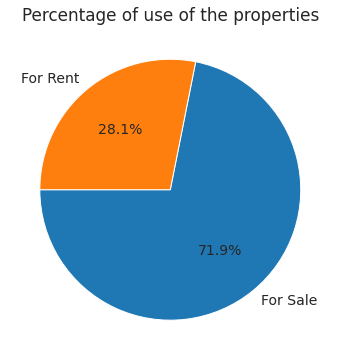

In [56]:
plt.figure(figsize=(12,6))
plt.title('Percentage of use of the properties')
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=180);

It is clear a higher percentage (71.9%) of the properties in this dataset are for sale and only 28.1% is for rent. This is quite and interest point.

### Now, we will explore the columns for CITY and PROVINCE before going into asking questions and answers.

In [57]:
city_counts = house_df['city'].value_counts()
city_counts

Karachi       52099
Lahore        37343
Islamabad     33365
Rawalpindi    18478
Faisalabad     6672
Name: city, dtype: int64

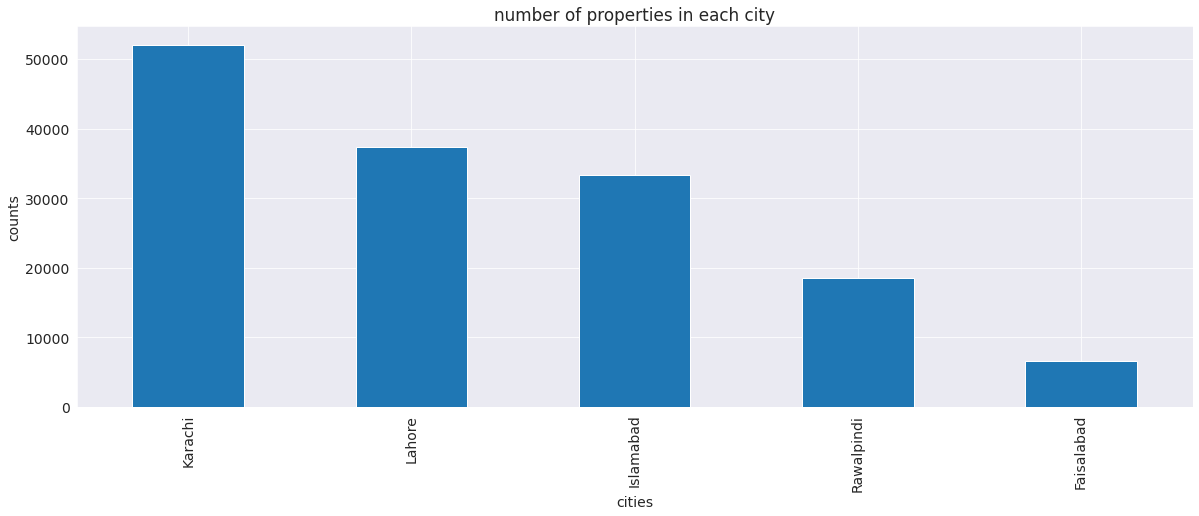

In [60]:
city_counts.plot.bar(xlabel = 'cities', ylabel = 'counts', title = ('number of properties in each city'));

Karachi has the highest number of properties (above 50000).

In [61]:
province_counts = house_df['province_name'].value_counts()
province_counts

Punjab               62493
Sindh                52099
Islamabad Capital    33365
Name: province_name, dtype: int64

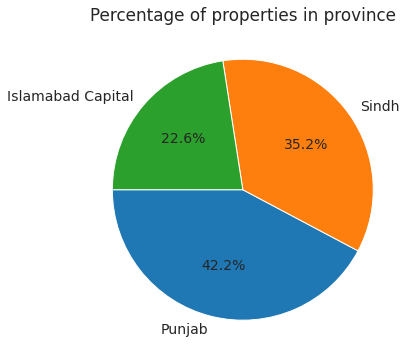

In [62]:
plt.figure(figsize=(12,6))
plt.title('Percentage of properties in province')
plt.pie(province_counts, labels=province_counts.index, autopct='%1.1f%%', startangle=180);

The Punjab province has the highest percentage of properties (42.2%)

In [63]:
house_df

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area_size_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
168440,Flat,4800000,Gadap Town,Karachi,Sindh,25.022481,67.129082,0,For Sale,2,07-18-2019,3.8
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,07-18-2019,9.6
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,07-18-2019,8.0
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,07-18-2019,9.6


In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

## Asking and Answering Questions





We've already gained several insights about the dataset considering the property types, city, price, number of baths and bedrooms as well the purpose for which the property is to be used. Let's ask some specific questions and try to answer them using data frame operations and visualizations.


### Q1:  Which Province has the highest mean price value of properties?

To answer this question, we will use the groupby method to create a Series named mean_price_by_province that shows the mean property price in each province in Pakistan, sorted from smallest to largest. Then we will draw a barchart to visualize our finding and then check online to confirm why that particular province has a high house price.

In [65]:
mean_price_by_province = house_df.groupby("province_name")["price"].mean().sort_values(ascending=True)
mean_price_by_province

province_name
Islamabad Capital    1.414791e+07
Punjab               1.903451e+07
Sindh                2.072942e+07
Name: price, dtype: float64

We will use the mean_price_by_province to create a bar chart. We will label the x-axis as "Province" and the y-axis as "Mean Price", and give the chart the title "Mean property Price by Province". We will use pandas.

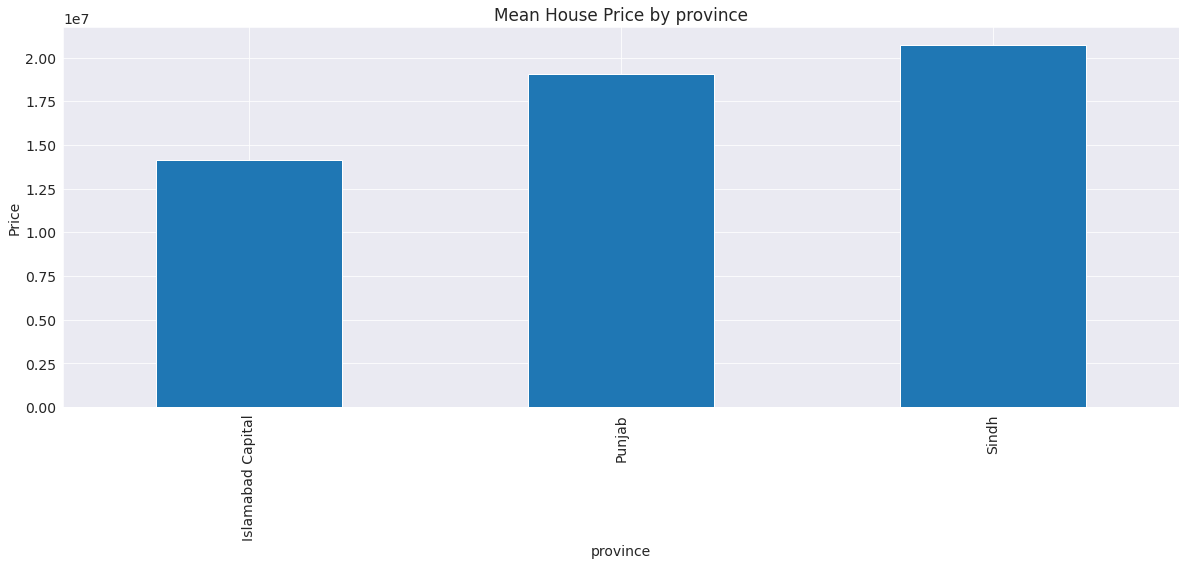

In [66]:
mean_price_by_province.plot( kind="bar", xlabel="province", ylabel="Price", title="Mean House Price by province");

Answer: 

Sindh Province has the highest mean price to buy properties. with an mean price of about 21 million to buy properties. Although Islamabad is the capital of Pakistan, one might easily guess that Islamabad should have the highest mean price. But the reverse is the case in this dataset because there are many determining variables.

### Q2:  Which city has the highest number of properties in the Punjab province of Pakistan

To answer this, lets Create a DataFrame house_df_punjab that contains all the properties from house_df that are in the "Punjab" province.

In [67]:
house_df_punjab = house_df[house_df["province_name"]=="Punjab"]
house_df_punjab.head(5)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area_size_Marla
47,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,For Sale,0,07-17-2019,120.0
48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,For Sale,5,10-06-2018,20.0
49,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,For Sale,3,07-03-2019,9.0
50,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,For Sale,8,04-04-2019,20.0
51,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,For Sale,6,04-04-2019,11.0


In [68]:
properties_by_city = house_df_punjab["city"].value_counts()
properties_by_city

Lahore        37343
Rawalpindi    18478
Faisalabad     6672
Name: city, dtype: int64

Now lets create a bar chart using the state index as x-axis and using the state as y-axis in order to know the city with the highest number of properties.

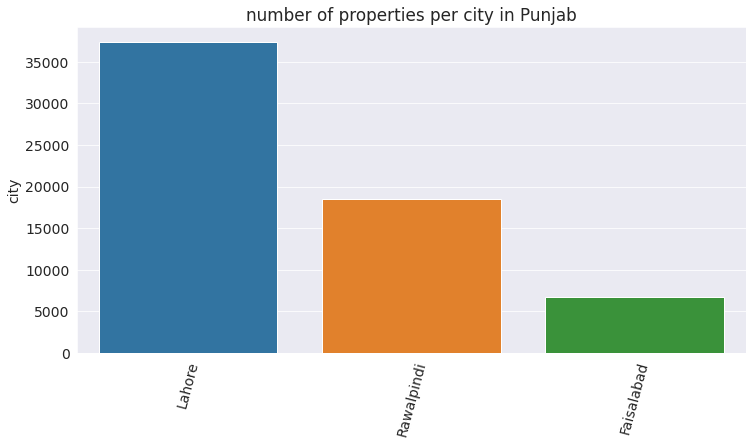

In [69]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('number of properties per city in Punjab')
sns.barplot(x=properties_by_city.index, y=properties_by_city);

Answer:

Lahore has the highest number of properties in Punjab, which might also make it to have the highest mean price. In another chart, we will explore the city with the highest mean price. Faisalabad has the least number of properties.

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

### Q3:  What is the relationship between Area_size and price in the Lahore city of the Punjab Province

To answer this question, we will create a scatter plot showing price vs. area for the city of Lahore. We will label the x-axis "Area [Marla]" and the y-axis "Price"; and use the title ": Price vs. Area". We will use Matplotlib (plt).

In [71]:
# Subset data
house_df_punjab_lahore =house_df[house_df["city"]=="Lahore"]
house_df_punjab_lahore

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area_size_Marla
47,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,For Sale,0,07-17-2019,120.0
48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,For Sale,5,10-06-2018,20.0
49,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,For Sale,3,07-03-2019,9.0
50,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,For Sale,8,04-04-2019,20.0
51,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,For Sale,6,04-04-2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
168426,House,44000000,DHA Defence,Lahore,Punjab,31.486906,74.385896,7,For Sale,6,07-18-2019,20.0
168427,House,55000000,DHA Defence,Lahore,Punjab,31.466227,74.440012,6,For Sale,5,07-18-2019,20.0
168428,House,20500000,DHA Defence,Lahore,Punjab,31.494408,74.437666,4,For Sale,3,07-18-2019,10.0
168429,House,170000000,DHA Defence,Lahore,Punjab,31.475378,74.373808,5,For Sale,5,07-18-2019,40.0


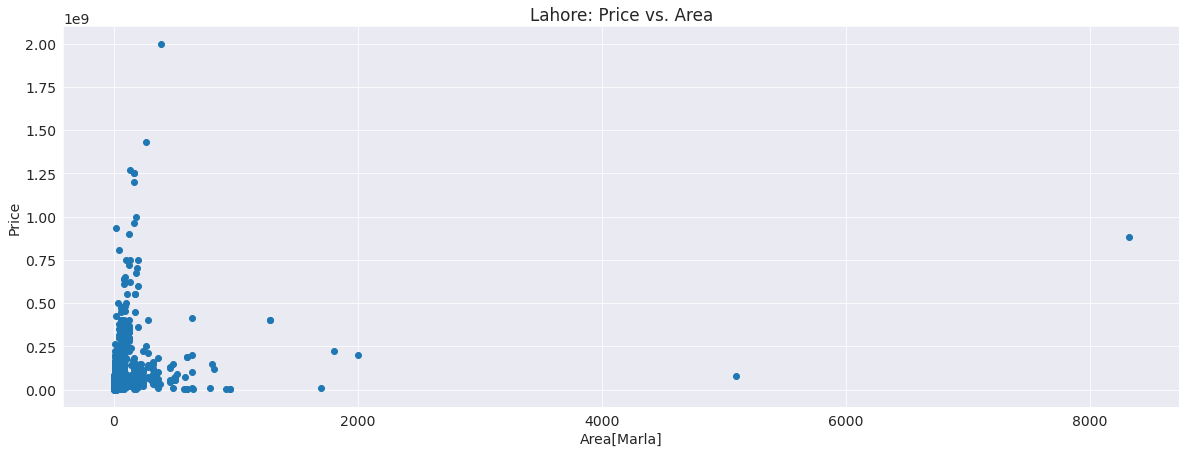

In [72]:
# Build scatter plot
plt.scatter(x=house_df_punjab_lahore["Area_size_Marla"], y=house_df_punjab_lahore["price"])
plt.xlabel("Area[Marla]")
plt.ylabel("Price")
plt.title("Lahore: Price vs. Area");

The realtionship between Area and Price is not very clear. However, we can see that most of the data are concentrated between 0 and 200 marla where price increases as area increases upto 100 Marla. However, the correlation between price and area is not very clear.

In [73]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

### Q4: Which city is more expensive to buy or rent a property?

To answer this question, we will use the groupby method to create a Series named mean_price_by_city that shows the mean property price in each city in Pakistan, sorted from smallest to largest. Then we will draw a barchart to visualize our finding and then check online to confirm why that particular province has a high house price.

In [74]:
mean_price_by_city = house_df.groupby("city")["price"].mean().sort_values(ascending=True)
mean_price_by_city

city
Faisalabad    8.229373e+06
Rawalpindi    9.152591e+06
Islamabad     1.414791e+07
Karachi       2.072942e+07
Lahore        2.585480e+07
Name: price, dtype: float64

Now, lets use the mean_price_by_city to create a bar chart.

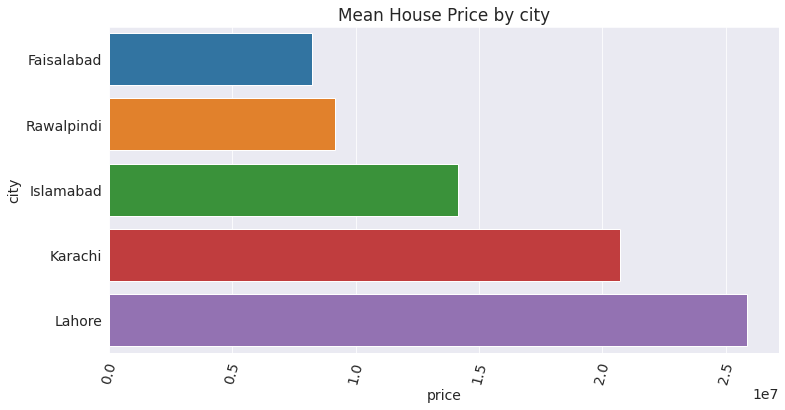

In [75]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Mean House Price by city')
sns.barplot(x=mean_price_by_city, y=mean_price_by_city.index);

Answer:

Lahore is the most expensive city to get a property. You will need above 25 million to get a property in Lahore. 

This site https://sigmaproperties.com.pk/most-expensive-area-in-pakistan/  proves that Lahore is Pakistan’s largest city as well as Pakistan’s wealthiest cities with an approximate GDP of $84 billion in 2019. The Walled City, the prominent Badshahi and Wazir Khan Mosques, as well as several Sikh and Sufi shrines, are all located in the city, which generates a large portion of Pakistan’s tourism business.
Our visualization revealed that Karachi is the second most expensive city to get a propert.While Rawalpindi and Faisalabad are the least respectively.

### Q5: Which property is more expensive to buy/rent?

In [76]:
mean_price_by_property = house_df.groupby("property_type")["price"].mean().sort_values(ascending=True)
mean_price_by_property

property_type
Room             4.670446e+05
Lower Portion    1.476262e+06
Upper Portion    2.184854e+06
Flat             8.406271e+06
Penthouse        1.710077e+07
House            2.556559e+07
Farm House       6.153839e+07
Name: price, dtype: float64

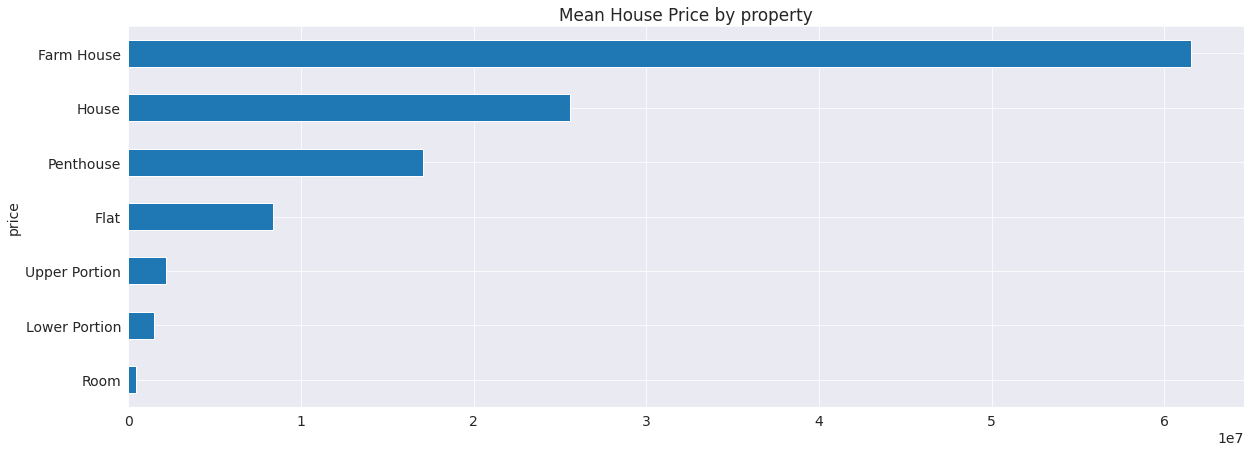

In [77]:
mean_price_by_property.plot( kind="barh", xlabel="price", ylabel="Property", title="Mean House Price by property");

Answer:

Farm Houses are the most expensive property to get in Pakistan with a mean price of about 61 million.
Its really intersting to know that the mean proce of House is less expensive than Farm houses. Getting a room is the least expensive with about 470,000 PKR.

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

# Inferences and Conclusions

We've drawn many inferences from thIS Dataset. Here's a summary of a few of them:

1. Sindh Province has the highest mean price to buy properties. with an mean price of about 21 million to buy properties. Although Islamabad is the capital of Pakistan, one might easily guess that Islamabad should have the highest mean price. But the reverse is the case in this dataset because there are many determining variables.


2. Lahore has the highest number of properties in Punjab, which might also make it to have the highest mean price. We did further analysis in order to explore the city with the highest mean price. Faisalabad has the least number of properties.


3. Lahore is the most expensive city to get a property. You will need above 25 million to get a property in Lahore. This site https://sigmaproperties.com.pk/most-expensive-area-in-pakistan/ proves that Lahore is Pakistan’s largest city as well as Pakistan’s wealthiest cities with an approximate GDP of $84 billion in 2019. The Walled City, the prominent Badshahi and Wazir Khan Mosques, as well as several Sikh and Sufi shrines, are all located in the city, which generates a large portion of Pakistan’s tourism business. Our visualization revealed that Karachi is the second most expensive city to get a propert.While Rawalpindi and Faisalabad are the least respectively.


4. Farm Houses are the most expensive property to get in Pakistan with a mean price of about 61 million.
Its really intersting to know that the mean proce of House is less expensive than Farm houses. Getting a room is the least expensive with about 470,000 PKR.

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

## References and Future Work


Check out the following resources to learn more about the dataset and tools used in this notebook:

- Kaggle House (Pakistan) Prices 2023 Dataset: https://www.kaggle.com/datasets/howisusmanali/house-prices-2023-dataset?select=House_Price_dataset.csv.


- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html


- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html


- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html


- opendatasets Python library: https://github.com/JovianML/opendatasets


- Most Expensive Residential Area in Pakistan: https://sigmaproperties.com.pk/most-expensive-area-in-pakistan/



In the future, I will like to use Machine Learning models to predict house prices in Pakistan. As well as explore the effect of the number of baths and bedrooms as critical variables. I find this site https://sigmaproperties.com.pk/most-expensive-area-in-pakistan/ very helpful.

In [81]:
import jovian

In [82]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "andrew-efomzy/eda-for-house-prices-in-pakistan-2023" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023


'https://jovian.com/andrew-efomzy/eda-for-house-prices-in-pakistan-2023'